In [135]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing the required libraries**

In [352]:
import numpy             as np
import pandas            as pd
import yfinance          as yf
import matplotlib.pyplot as plt

## **Getting Stock Data**

In [353]:
#Here we are creating a function to extract the stock info of any required stock using the yahoo finance library

def stock_data(symbol):
  ticker = yf.Ticker(symbol)
  df = ticker.history(start = "2019-12-20", end = '2022-12-20')
  return df

### **Moving Standard Deviations**

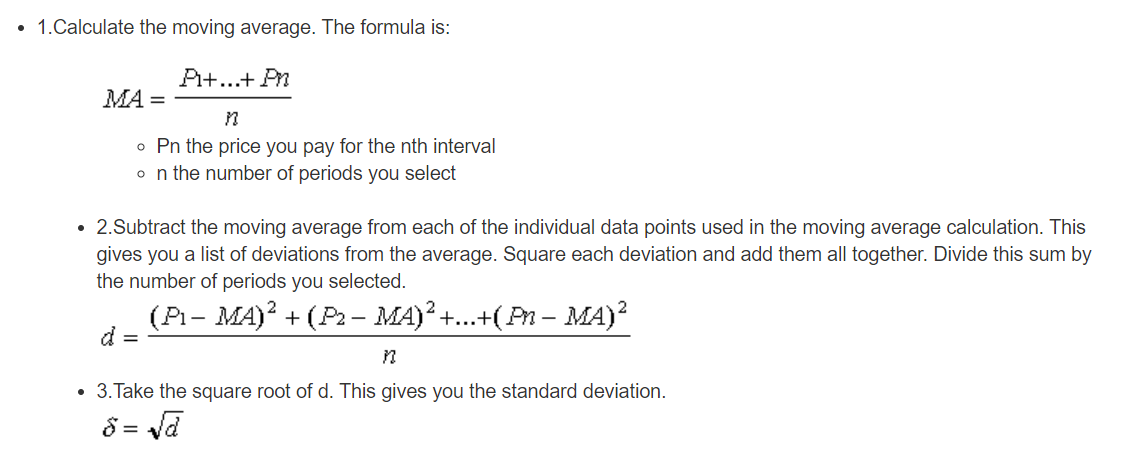

**Function for Calculating Moving Standard Deviations**

In [354]:
#This is the function to calculate the standard moving deviation

def moving_std(data,period):
  data['std']= data['Close'].rolling(period).std()
  data.dropna(inplace = True)
  return data

**Here we have chosen the fast moving standard deviation has n = 20 and slow moving standard deviations has n = 50** 

In [355]:
#Here we are choosing two n = 20 & n = 50, so 

moving_std_20 = moving_std(stock_data('^GSPC'),20)
moving_std_50 = moving_std(stock_data('^GSPC'),50)

moving_std_20

,Open,High,Low,Close,Volume,Dividends,Stock Splits,std
Date,,,,,,,,
2020-01-21 00:00:00-05:00,3321.030029,3329.790039,3316.610107,3320.790039,4104840000,0.0,0.0,34.708593
2020-01-22 00:00:00-05:00,3330.020020,3337.770020,3320.040039,3321.750000,3623780000,0.0,0.0,36.067497
2020-01-23 00:00:00-05:00,3315.770020,3326.879883,3301.870117,3325.540039,3766710000,0.0,0.0,37.137225
2020-01-24 00:00:00-05:00,3333.100098,3333.179932,3281.530029,3295.469971,3708780000,0.0,0.0,35.851851
2020-01-27 00:00:00-05:00,3247.159912,3258.850098,3234.500000,3243.629883,3831050000,0.0,0.0,35.677144
...,...,...,...,...,...,...,...,...
2022-12-13 00:00:00-05:00,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,0.0,0.0,47.152492
2022-12-14 00:00:00-05:00,4015.540039,4053.760010,3965.649902,3995.320068,4472340000,0.0,0.0,47.165978
2022-12-15 00:00:00-05:00,3958.370117,3958.370117,3879.449951,3895.750000,4493900000,0.0,0.0,51.303870


**Plotting Of Graph**

In [356]:
#Now we are going to create a function to plot the graph

def moving_standard_deviation(std_long, std_short, data): 

  plt.figure(figsize=(14,6))
  l1 = plt.plot(data, c='m')
  l2 = plt.plot(std_long, c='yellow')
  l3 = plt.plot(std_short, c='orange')
  plt.ylabel('Stock Closing Price')
  plt.xlabel('Date')
  plt.title('Stock Closing Price Along with Moving Standard Deviations')
  plt.legend(['Stock Closing Price', 'Long Moving Standard Deviations', 'Short Moving Standard Deviations'], loc='upper left');

In [357]:
stock = stock_data('^GSPC')

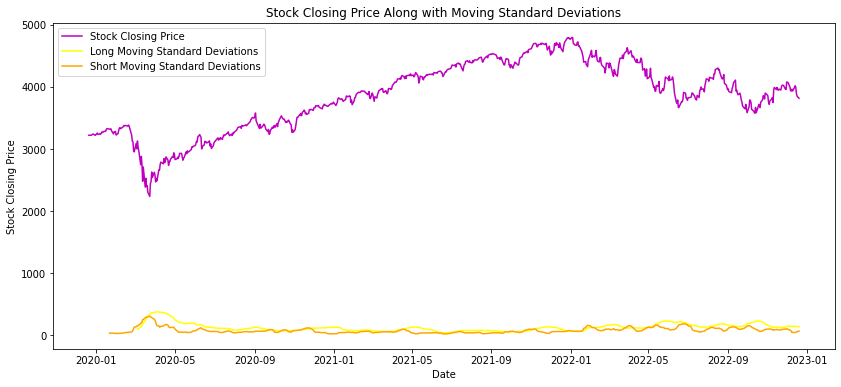

In [358]:
moving_standard_deviation(moving_std_50['std'], moving_std_20['std'], stock['Close'])

 **Trading Signal Generator**

Here we have chosen a strategy where faster moving standard deviation crosses the slower moving standard deviation then it generates a buy signal and if the slower moving standard deviation crosses the faster moving standard deviation then it generates the sell signal. 

In [359]:
#This is the function to generate the trading signals either to buy or sell the stock

def trading_signals(data, short_moving_std, long_moving_std):
  signal = pd.DataFrame()
  signal['Close'] = data
  signal['Short Moving Standard Deviation'] = short_moving_std
  signal['Long Moving Standard Deviation'] = long_moving_std
  buy_price  = []
  sell_price = []

  flag = False

  for i in range(0, len(data)):

    if signal['Short Moving Standard Deviation'][i] > signal['Long Moving Standard Deviation'][i] and flag == False:
      buy_price.append(signal['Close'][i])
      sell_price.append(np.nan)
      flag = True

    elif signal['Short Moving Standard Deviation'][i] > signal['Long Moving Standard Deviation'][i] and flag == True:
      buy_price.append(np.nan)
      sell_price.append(signal['Close'][i])
      flag = False

    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)

  signal['Buy']  = buy_price
  signal['Sell'] = sell_price

  return signal 

In [360]:
Trading_Signals = trading_signals(stock['Close'], moving_std_20['std'], moving_std_50['std'])
Trading_Signals

,Close,Short Moving Standard Deviation,Long Moving Standard Deviation,Buy,Sell
Date,,,,,
2019-12-20 00:00:00-05:00,3221.219971,NaN,NaN,NaN,NaN
2019-12-23 00:00:00-05:00,3224.010010,NaN,NaN,NaN,NaN
2019-12-24 00:00:00-05:00,3223.379883,NaN,NaN,NaN,NaN
2019-12-26 00:00:00-05:00,3239.909912,NaN,NaN,NaN,NaN
2019-12-27 00:00:00-05:00,3240.020020,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-12-13 00:00:00-05:00,4019.649902,47.152492,143.478678,NaN,NaN
2022-12-14 00:00:00-05:00,3995.320068,47.165978,144.514421,NaN,NaN
2022-12-15 00:00:00-05:00,3895.750000,51.303870,144.180124,NaN,NaN


**Plotting the trading signals**

In [361]:
#This is the function to plot the trading signals on the graph 

def plotting_trading_signals(signal):

  plt.figure(figsize=(14,6),)
  l1 = plt.plot(signal['Close'], c='m', alpha=0.5)
  l2 = plt.plot(signal['Long Moving Standard Deviation'], c='yellow', alpha=0.5)
  l3 = plt.plot(signal['Short Moving Standard Deviation'], c='orange', alpha=0.5)
  plt.scatter(signal.index, signal['Buy'], c='green', label='Buy Signal', marker='^')
  plt.scatter(signal.index, signal['Sell'], c='red', label='Sell Signal', marker='v')
  plt.ylabel('Stock Closing Price')
  plt.xlabel('Date')
  plt.title('Buy Sell Signal Plot')
  plt.legend(['Stock Closing Price', 'Long Moving Standard Deviation', 'Short Moving Standard Deviation'], loc='upper left');

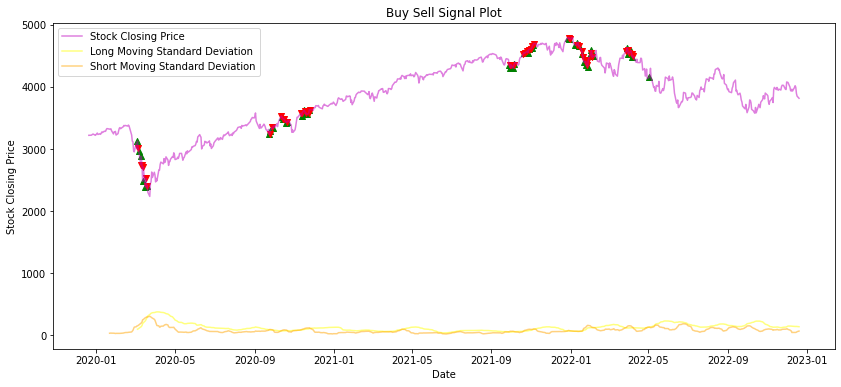

In [362]:
plotting_trading_signals(Trading_Signals)

**Compound Annual Growth Rate**

In [363]:
#This is the function to calculate the Compound annual growth rate aka CAGR

#Assumptions in this function 

#In this function i assume that we start off with a capital of 100,000
#Upon encountering a buy signal no_of_stocks amount of stocks are bought
#Upon encountering a sell signal no_of_stocks amount of stocks are sold
#In the end of the simulation, all stocks held are sold off at the current market price

def cagr_calculation(signal):

  initial_capital = 100000
  no_of_stocks = initial_capital // max(signal['Close'])
  assets_in_cash = 100000
  stocks_held = 0
  buy_check = signal['Buy'].isna()
  sell_check = signal['Sell'].isna()

  for i in range(0, len(signal)):
    
    if buy_check[i] == False:
      assets_in_cash -= no_of_stocks * signal['Buy'][i]
      stocks_held += no_of_stocks

    if sell_check[i] == False:
      assets_in_cash += no_of_stocks * signal['Sell'][i]
      stocks_held -= no_of_stocks

  final_assets = assets_in_cash + stocks_held * signal['Close'][len(signal) - 1]
  no_of_days = (signal.index[-1] - signal.index[0]).days
  returns = ((final_assets / initial_capital) ** (float(no_of_days) / (3 * 365)) - 1) * 100
  
  return returns

In [364]:
print('CAGR =', cagr_calculation(Trading_Signals), '%')

CAGR = 5.0790234374999965 %


### **Stochastic Oscillator**

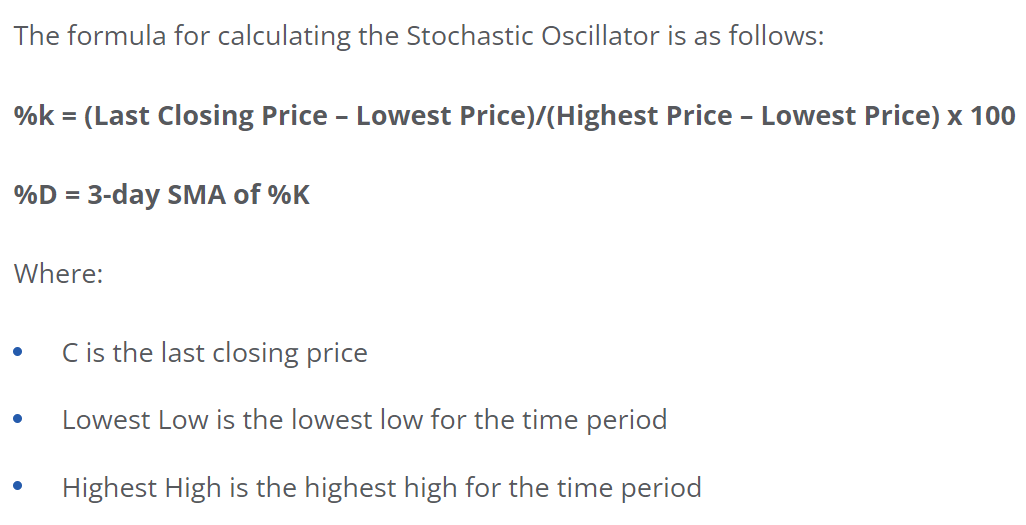

**Function for calculating Stochastic Oscillator**

In [365]:
stochastic_period = 14
def stochastic_oscillator(data, period):
  data['Period Low' ] = data['Low'].rolling(period).min()
  data['Period High'] = data['High'].rolling(period).max()
  data['Stochastic Oscillator'] = (data['Close']-data['Period Low'])/(data['Period High'] - data['Period Low'])
  return data

In [366]:
stock_info_stochastic_oscillator = stochastic_oscillator(stock_data('^GSPC'), stochastic_period)

In [367]:
stock_info_stochastic_oscillator

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Period Low,Period High,Stochastic Oscillator
Date,,,,,,,,,,
2019-12-20 00:00:00-05:00,3223.330078,3225.649902,3216.030029,3221.219971,6457480000,0.0,0.0,NaN,NaN,NaN
2019-12-23 00:00:00-05:00,3226.050049,3227.780029,3222.300049,3224.010010,3064530000,0.0,0.0,NaN,NaN,NaN
2019-12-24 00:00:00-05:00,3225.449951,3226.429932,3220.510010,3223.379883,1296530000,0.0,0.0,NaN,NaN,NaN
2019-12-26 00:00:00-05:00,3227.199951,3240.080078,3227.199951,3239.909912,2164540000,0.0,0.0,NaN,NaN,NaN
2019-12-27 00:00:00-05:00,3247.229980,3247.929932,3234.370117,3240.020020,2429150000,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-13 00:00:00-05:00,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,0.0,0.0,3918.389893,4100.959961,0.554636
2022-12-14 00:00:00-05:00,4015.540039,4053.760010,3965.649902,3995.320068,4472340000,0.0,0.0,3918.389893,4100.959961,0.421373
2022-12-15 00:00:00-05:00,3958.370117,3958.370117,3879.449951,3895.750000,4493900000,0.0,0.0,3879.449951,4100.959961,0.073586


**Plotting of Graphs**

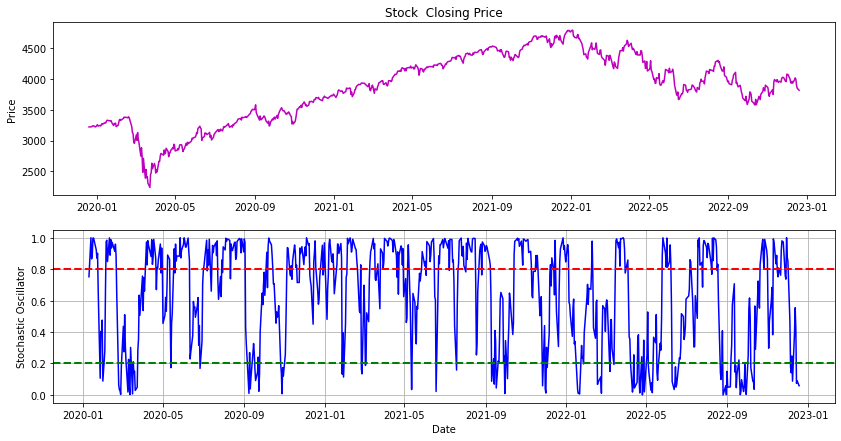

In [368]:
#Plotting the Closing prices of the stock

fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(stock_info_stochastic_oscillator['Close'], color = 'm')
ax1.set_title('Stock ' +' Closing Price')
ax1.set_ylabel('Price')

#Plotting the Stochastic Oscillator

ax2 = plt.subplot(2, 1, 2)
ax2.plot(stock_info_stochastic_oscillator['Stochastic Oscillator'], label='Stochastic Oscillator', color = 'blue')
ax2.grid()
ax2.axhline(0.8, color = 'red', linewidth = 2, linestyle = '--')
ax2.axhline(0.2, color = 'green', linewidth = 2, linestyle = '--')
ax2.set_ylabel('Stochastic Oscillator')
ax2.set_xlabel('Date')
plt.show()

**Trading Signal Generator**

Here we have adopted the strategy where, if the line moves below the lower band i.e an oversold condition it will indicate a buying signal and if the line moves above the lower band i.e an overbought condition it will indicate a selling signal 

The lower limit is assumed to be 0.2 and the upper limit is assumed to be 0.8

In [369]:
#This is the function to get the trading signals for the stocks using stochastic oscillator

def trading_signals_stoch_osc(df): 

  signal_stoch_osci = pd.DataFrame()
  signal_stoch_osci['Close'] = df['Close']
  signal_stoch_osci['Stochastic Oscillator'] = df['Stochastic Oscillator']
  buy_price = []
  sell_price = []

  lower_band = 0.2
  upper_band = 0.8

  flag = False

  for i in range(0, len(signal_stoch_osci['Close'])):

    if signal_stoch_osci['Stochastic Oscillator'][i-1] > lower_band and  signal_stoch_osci['Stochastic Oscillator'][i]<lower_band and flag == False:
      buy_price.append(signal_stoch_osci['Close'][i])
      sell_price.append(np.nan)
      flag = True

    elif signal_stoch_osci['Stochastic Oscillator'][i-1] < upper_band and  signal_stoch_osci['Stochastic Oscillator'][i]>upper_band and flag == True:
      buy_price.append(np.nan)
      sell_price.append(signal_stoch_osci['Close'][i])
      flag = False

    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)

  signal_stoch_osci['Buy'] = buy_price
  signal_stoch_osci['Sell'] = sell_price
  
  return signal_stoch_osci

In [370]:
Trading_Signals_Stochastic_Oscillator = trading_signals_stoch_osc(stock_info_stochastic_oscillator)
Trading_Signals_Stochastic_Oscillator

,Close,Stochastic Oscillator,Buy,Sell
Date,,,,
2019-12-20 00:00:00-05:00,3221.219971,NaN,NaN,NaN
2019-12-23 00:00:00-05:00,3224.010010,NaN,NaN,NaN
2019-12-24 00:00:00-05:00,3223.379883,NaN,NaN,NaN
2019-12-26 00:00:00-05:00,3239.909912,NaN,NaN,NaN
2019-12-27 00:00:00-05:00,3240.020020,NaN,NaN,NaN
...,...,...,...,...
2022-12-13 00:00:00-05:00,4019.649902,0.554636,NaN,NaN
2022-12-14 00:00:00-05:00,3995.320068,0.421373,NaN,NaN
2022-12-15 00:00:00-05:00,3895.750000,0.073586,NaN,NaN


**Plotting the trading signals**

In [371]:
#This is the function to plot the trading signals recieved by 
def plotting_signals_stochastic_oscillator(signals_sto):

  plt.figure(figsize=(14,7))
  l1 = plt.plot(signals_sto['Close'], c='m', alpha=0.5)

  plt.scatter(signals_sto.index, signals_sto['Buy'], c='green', label='Buy Signal', marker='^')
  plt.scatter(signals_sto.index, signals_sto['Sell'], c='red', label='Sell Signal', marker='v')
  plt.ylabel('Stock Closing Price')
  plt.xlabel('Date')
  plt.title('Buy Sell Signal Plot')
  plt.legend(['Stock Closing Price'], loc='upper left');

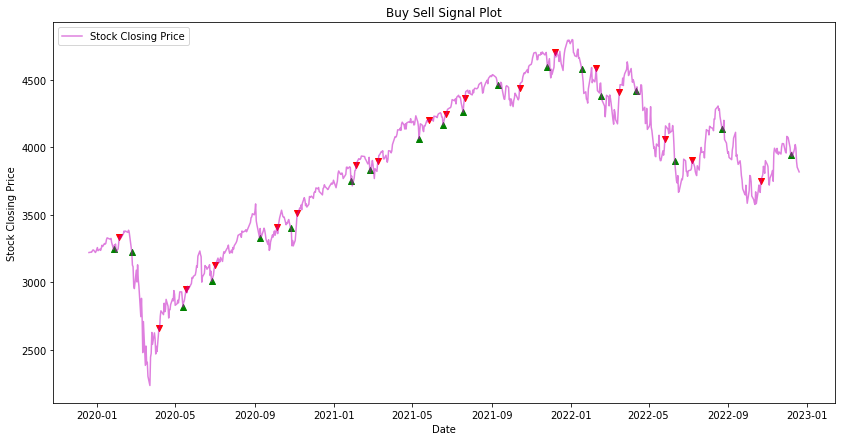

In [372]:
plotting_signals_stochastic_oscillator(Trading_Signals_Stochastic_Oscillator)

**Compound Annual Growth Rate**

In [373]:
#This is the function to calculate the Compound annual growth rate aka CAGR

#Assumptions in this function 

#In this function i assume that we start off with a capital of 100,000
#Upon encountering a buy signal no_of_stocks amount of stocks are bought
#Upon encountering a sell signal no_of_stocks amount of stocks are sold
#In the end of the simulation, all stocks held are sold off at the current market price

def cagr_calculation_stoch_osci(signal):

  initial_capital = 100000
  no_of_stocks = initial_capital // max(signal['Close'])
  assets_in_cash = 100000
  stocks_held = 0
  buy_check = signal['Buy'].isna()
  sell_check = signal['Sell'].isna()

  for i in range(0, len(signal)):
    
    if buy_check[i] == False:
      assets_in_cash -= no_of_stocks * signal['Buy'][i]
      stocks_held += no_of_stocks

    if sell_check[i] == False:
      assets_in_cash += no_of_stocks * signal['Sell'][i]
      stocks_held -= no_of_stocks

  final_assets = assets_in_cash + stocks_held * signal['Close'][len(signal) - 1]
  no_of_days = (signal.index[-1] - signal.index[0]).days
  returns = ((final_assets / initial_capital) ** (float(no_of_days) / (3 * 365)) - 1) * 100
  
  return returns

In [374]:
print('CAGR =', cagr_calculation_stoch_osci(Trading_Signals_Stochastic_Oscillator), '%')

CAGR = -4.936015625000001 %


### **Money Flow Index**

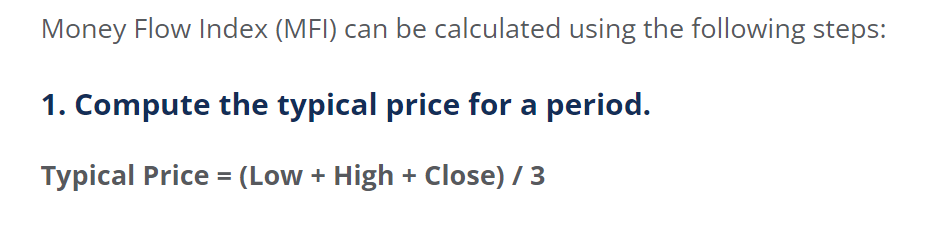

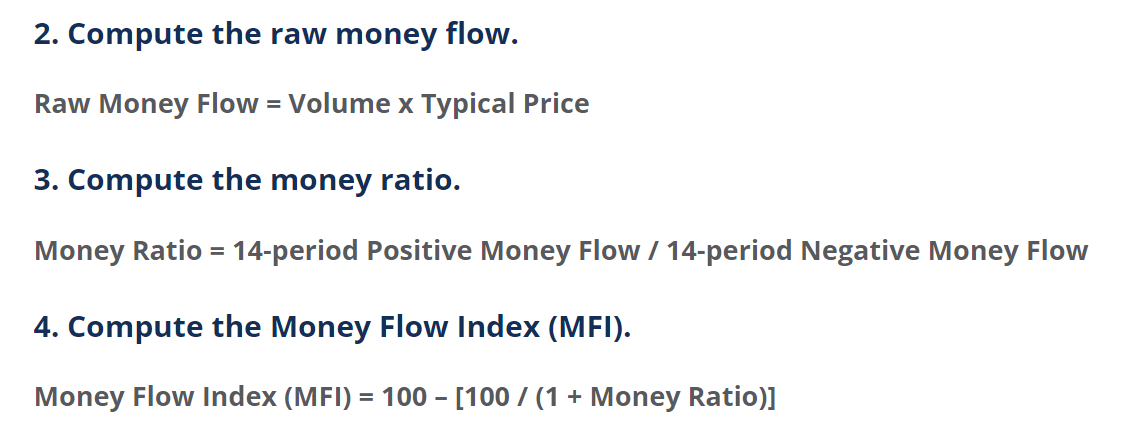

**Function for calculating Money flow Index**

In [375]:
def gain(x):
    return ((x > 0) * x).sum()


def loss(x):
    return ((x < 0) * x).sum()

def money_flow_index(data, n):
    typical_price = (data['High'] + data['Low'] + data['Close'])/3
    money_flow = typical_price * data['Volume']
    money_flow_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    sign_of_money_flow = money_flow * money_flow_sign
    mf_avg_gain = sign_of_money_flow.rolling(n).apply(gain, raw=True)
    mf_avg_loss = sign_of_money_flow.rolling(n).apply(loss, raw=True)
    mfi = (100 - (100 / (1 + (mf_avg_gain / abs(mf_avg_loss))))).to_numpy()
    data['Money Flow Index'] = mfi
    return data

In [376]:
stock_info_for_mfi = stock_data('^GSPC')

In [377]:
money_flow_index(stock_info_for_mfi, 14)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Money Flow Index
Date,,,,,,,,
2019-12-20 00:00:00-05:00,3223.330078,3225.649902,3216.030029,3221.219971,6457480000,0.0,0.0,NaN
2019-12-23 00:00:00-05:00,3226.050049,3227.780029,3222.300049,3224.010010,3064530000,0.0,0.0,NaN
2019-12-24 00:00:00-05:00,3225.449951,3226.429932,3220.510010,3223.379883,1296530000,0.0,0.0,NaN
2019-12-26 00:00:00-05:00,3227.199951,3240.080078,3227.199951,3239.909912,2164540000,0.0,0.0,NaN
2019-12-27 00:00:00-05:00,3247.229980,3247.929932,3234.370117,3240.020020,2429150000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
2022-12-13 00:00:00-05:00,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,0.0,0.0,51.362390
2022-12-14 00:00:00-05:00,4015.540039,4053.760010,3965.649902,3995.320068,4472340000,0.0,0.0,44.643529
2022-12-15 00:00:00-05:00,3958.370117,3958.370117,3879.449951,3895.750000,4493900000,0.0,0.0,39.850297


**Plotting of Graph**

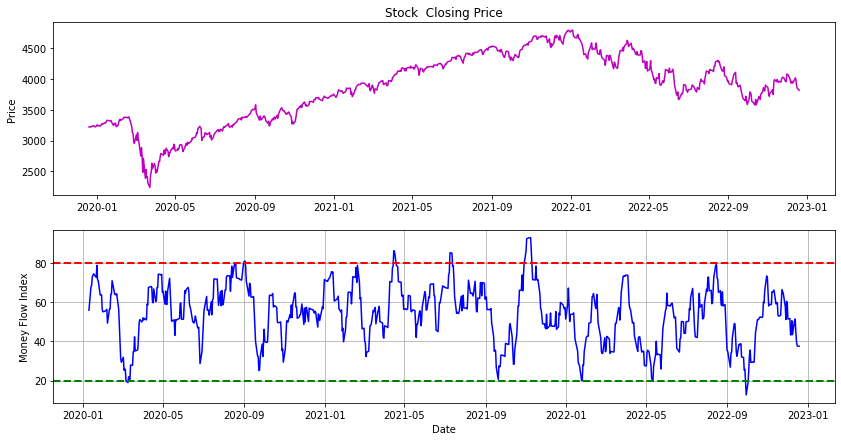

In [378]:
#Plotting the Closing prices of the stock

fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(stock_info_for_mfi['Close'], color = 'm')
ax1.set_title('Stock ' +' Closing Price')
ax1.set_ylabel('Price')

#Plotting the Money Flow Index

ax2 = plt.subplot(2, 1, 2)
ax2.plot(stock_info_for_mfi['Money Flow Index'], label='Money Flow Index', color = 'blue')
ax2.grid()
ax2.axhline(80, color = 'red', linewidth = 2, linestyle = '--')
ax2.axhline(20, color = 'green', linewidth = 2, linestyle = '--')
ax2.set_ylabel('Money Flow Index')
ax2.set_xlabel('Date')
plt.show()

**Trading Signal Generator**

Here we have adopted the strategy where, if the line moves below the lower band i.e an oversold condition it will indicate a buying signal and if the line moves above the lower band i.e an overbought condition it will indicate a selling signal 

The lower limit is assumed to be 20 and the upper limit is assumed to be 80

In [379]:
#This is the function to get the trading signals for the stocks using stochastic oscillator

def trading_signals_mfi(df): 

  signal_mfi = pd.DataFrame()
  signal_mfi['Close'] = df['Close']
  signal_mfi['Money Flow Index'] = df['Money Flow Index']
  buy_price  = []
  sell_price = []

  lower_band = 20
  upper_band = 80

  flag = False

  for i in range(0, len(signal_mfi['Close'])):

    if signal_mfi['Money Flow Index'][i-1] > lower_band and  signal_mfi['Money Flow Index'][i]<lower_band and flag == False:
      buy_price.append(signal_mfi['Close'][i])
      sell_price.append(np.nan)
      flag = True

    elif signal_mfi['Money Flow Index'][i-1] < upper_band and  signal_mfi['Money Flow Index'][i]>upper_band and flag == True:
      buy_price.append(np.nan)
      sell_price.append(signal_mfi['Close'][i])
      flag = False

    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)

  signal_mfi['Buy'] = buy_price
  signal_mfi['Sell'] = sell_price
  
  return signal_mfi

In [380]:
Trading_Signals_mfi = trading_signals_mfi(stock_info_for_mfi)
Trading_Signals_mfi

,Close,Money Flow Index,Buy,Sell
Date,,,,
2019-12-20 00:00:00-05:00,3221.219971,NaN,NaN,NaN
2019-12-23 00:00:00-05:00,3224.010010,NaN,NaN,NaN
2019-12-24 00:00:00-05:00,3223.379883,NaN,NaN,NaN
2019-12-26 00:00:00-05:00,3239.909912,NaN,NaN,NaN
2019-12-27 00:00:00-05:00,3240.020020,NaN,NaN,NaN
...,...,...,...,...
2022-12-13 00:00:00-05:00,4019.649902,51.362390,NaN,NaN
2022-12-14 00:00:00-05:00,3995.320068,44.643529,NaN,NaN
2022-12-15 00:00:00-05:00,3895.750000,39.850297,NaN,NaN


**Plotting of Trading Signals**

In [381]:
#This is the function to plot the trading signals recieved by 
def plotting_signals_mfi(signals_mfi):

  plt.figure(figsize=(14,7))
  l1 = plt.plot(signals_mfi['Close'], c='m', alpha=0.5)

  plt.scatter(signals_mfi.index, signals_mfi['Buy'], c='green', label='Buy Signal', marker='^')
  plt.scatter(signals_mfi.index, signals_mfi['Sell'], c='red', label='Sell Signal', marker='v')
  plt.ylabel('Stock Closing Price')
  plt.xlabel('Date')
  plt.title('Buy Sell Signal Plot')
  plt.legend(['Stock Closing Price'], loc='upper left');

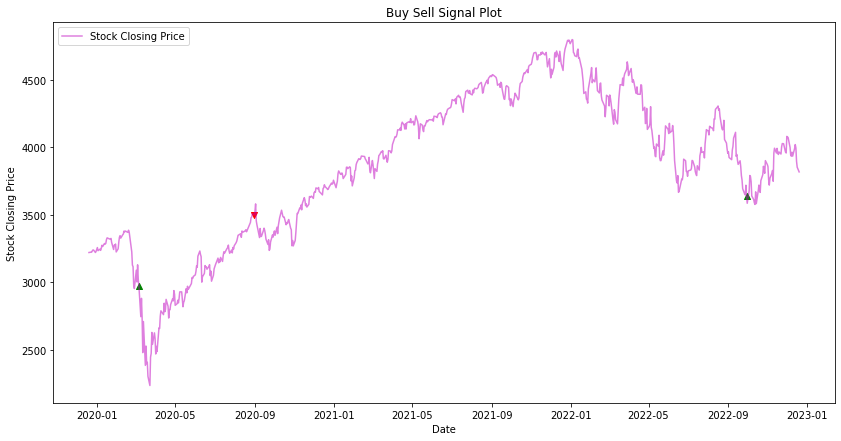

In [382]:
plotting_signals_mfi(Trading_Signals_mfi)

**Compound Annual Growth Rate**

In [383]:
#This is the function to calculate the Compound annual growth rate aka CAGR

#Assumptions in this function 

#In this function i assume that we start off with a capital of 100,000
#Upon encountering a buy signal no_of_stocks amount of stocks are bought
#Upon encountering a sell signal no_of_stocks amount of stocks are sold
#In the end of the simulation, all stocks held are sold off at the current market price

def cagr_calculation_mfi(signal):

  initial_capital = 100000
  no_of_stocks = initial_capital // max(signal['Close'])
  assets_in_cash = 100000
  stocks_held = 0
  buy_check = signal['Buy'].isna()
  sell_check = signal['Sell'].isna()

  for i in range(0, len(signal)):
    
    if buy_check[i] == False:
      assets_in_cash -= no_of_stocks * signal['Buy'][i]
      stocks_held += no_of_stocks

    if sell_check[i] == False:
      assets_in_cash += no_of_stocks * signal['Sell'][i]
      stocks_held -= no_of_stocks

  final_assets = assets_in_cash + stocks_held * signal['Close'][len(signal) - 1]
  no_of_days = (signal.index[-1] - signal.index[0]).days
  returns = ((final_assets / initial_capital) ** (float(no_of_days) / (3 * 365)) - 1) * 100
  
  return returns

In [384]:
print('CAGR =', cagr_calculation_mfi(Trading_Signals_mfi), '%')

CAGR = 14.102597656249994 %


### **Ease of Movement Indicator**

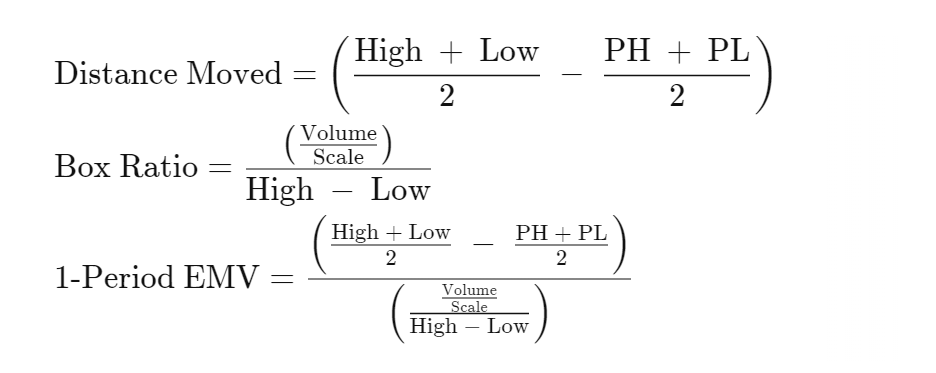

**Function for calculating Ease of Movement Indicator**

In [385]:
def Ease_Of_Movement(data, n): 
    distance_moved = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
    box_ratio = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
    EMV = distance_moved / box_ratio
    EMV_moving_average = pd.Series(EMV.rolling(n).mean(), name = 'EMV') 
    data = data.join(EMV_moving_average) 
    return data 

In [386]:
stock_info_for_FI = stock_data('^GSPC') 

n = 14
Stock_EMV = Ease_Of_Movement(stock_info_for_FI, n)
EMV = Stock_EMV['EMV']

**Plotting of Graph**

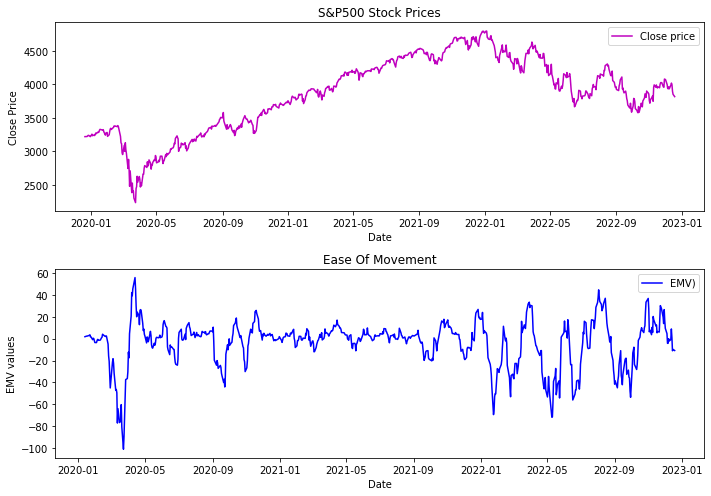

In [387]:
# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('S&P500 Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Plot the close price of the stock
plt.plot(stock_info_for_FI['Close'], label='Close price', color = 'm')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Ease Of Movement')
plt.xlabel('Date')
plt.ylabel('EMV values')

# Plot the ease of movement
plt.plot(EMV, 'blue', label='EMV)')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()

**Trading Signal Generator**

Here we have adopted the strategy where, if the line moves below the lower band i.e an oversold condition it will indicate a buying signal and if the line moves above the lower band i.e an overbought condition it will indicate a selling signal 

The lower limit is assumed to be -20 and the upper limit is assumed to be 20

In [388]:
#This is the function to get the trading signals for the stocks using stochastic oscillator

def trading_signals_EMV(df): 

  signal_EMV = pd.DataFrame()
  signal_EMV['Close'] = df['Close']
  signal_EMV['EMV'] = df['EMV']
  buy_price  = []
  sell_price = []

  lower_band = -20
  upper_band = 20

  flag = False

  for i in range(0, len(signal_EMV['Close'])):

    if signal_EMV['EMV'][i-1] > lower_band and  signal_EMV['EMV'][i]<lower_band and flag == False:
      buy_price.append(signal_EMV['Close'][i])
      sell_price.append(np.nan)
      flag = True

    elif signal_EMV['EMV'][i-1] < upper_band and  signal_EMV['EMV'][i]>upper_band and flag == True:
      buy_price.append(np.nan)
      sell_price.append(signal_EMV['Close'][i])
      flag = False

    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)

  signal_EMV['Buy'] = buy_price
  signal_EMV['Sell'] = sell_price
  
  return signal_EMV

In [389]:
Trading_Signals_EMV = trading_signals_EMV(Stock_EMV)
Trading_Signals_EMV

,Close,EMV,Buy,Sell
Date,,,,
2019-12-20 00:00:00-05:00,3221.219971,NaN,NaN,NaN
2019-12-23 00:00:00-05:00,3224.010010,NaN,NaN,NaN
2019-12-24 00:00:00-05:00,3223.379883,NaN,NaN,NaN
2019-12-26 00:00:00-05:00,3239.909912,NaN,NaN,NaN
2019-12-27 00:00:00-05:00,3240.020020,NaN,NaN,NaN
...,...,...,...,...
2022-12-13 00:00:00-05:00,4019.649902,8.859845,NaN,NaN
2022-12-14 00:00:00-05:00,3995.320068,0.947470,NaN,NaN
2022-12-15 00:00:00-05:00,3895.750000,-11.061834,NaN,NaN


**Plotting of Trading Signals**

In [390]:
#This is the function to plot the trading signals recieved by 
def plotting_signals_EMV(signals_EMV):

  plt.figure(figsize=(14,7))
  l1 = plt.plot(signals_EMV['Close'], c='m', alpha=0.5)

  plt.scatter(signals_EMV.index, signals_EMV['Buy'], c='green', label='Buy Signal', marker='^')
  plt.scatter(signals_EMV.index, signals_EMV['Sell'], c='red', label='Sell Signal', marker='v')
  plt.ylabel('Stock Closing Price')
  plt.xlabel('Date')
  plt.title('Buy Sell Signal Plot')
  plt.legend(['Stock Closing Price'], loc='upper left');

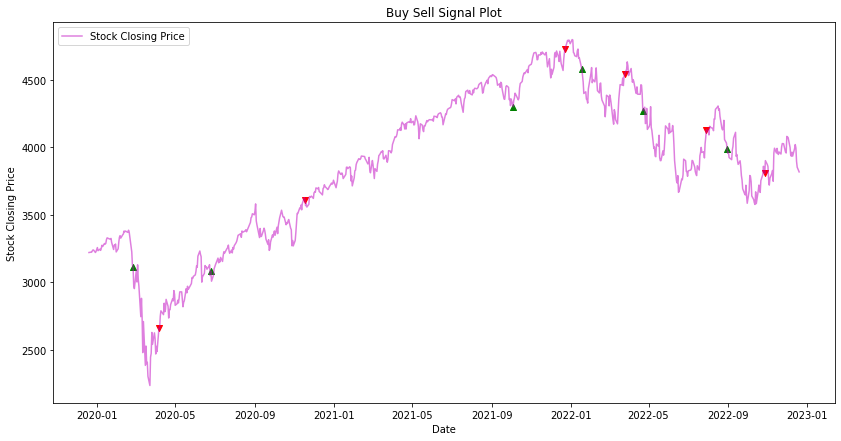

In [391]:
plotting_signals_EMV(Trading_Signals_EMV)

**Compound Annual Growth Rate**

In [392]:
#This is the function to calculate the Compound annual growth rate aka CAGR

#Assumptions in this function 

#In this function i assume that we start off with a capital of 100,000
#Upon encountering a buy signal no_of_stocks amount of stocks are bought
#Upon encountering a sell signal no_of_stocks amount of stocks are sold
#In the end of the simulation, all stocks held are sold off at the current market price

def cagr_calculation_EMV(signal):

  initial_capital = 100000
  no_of_stocks = initial_capital // max(signal['Close'])
  assets_in_cash = 100000
  stocks_held = 0
  buy_check = signal['Buy'].isna()
  sell_check = signal['Sell'].isna()

  for i in range(0, len(signal)):
    
    if buy_check[i] == False:
      assets_in_cash -= no_of_stocks * signal['Buy'][i]
      stocks_held += no_of_stocks

    if sell_check[i] == False:
      assets_in_cash += no_of_stocks * signal['Sell'][i]
      stocks_held -= no_of_stocks

  final_assets = assets_in_cash + stocks_held * signal['Close'][len(signal) - 1]
  no_of_days = (signal.index[-1] - signal.index[0]).days
  returns = ((final_assets / initial_capital) ** (float(no_of_days) / (3 * 365)) - 1) * 100
  
  return returns

In [393]:
print('CAGR =', cagr_calculation_EMV(Trading_Signals_EMV), '%')

CAGR = 2.879814453124996 %
